# 홍보 효과 분석
### 홍보 일자
- 11/ 19 홍보 포스터 부착
- 10 / 13 먼슬리 미팅
- 9/30 (2차 대규모 패치 - 세미콘 홍보)
- 9/3 (푸드라운지 식당 추가)
- 8/14 (1차 코드 리펙토링)
- 7/14 (지하철 블록 업데이트)
- 7/29 (막차 블록 업데이트)
- 5/23 (산돌이 꾸미기 - 프로필 사진 / 페르소나 등..)
- 5/21 (산돌팀 모집 및 1차 대규모 패치 홍보)
- 3/13 (산돌이 인스타그램 생성 및 홍보)
- 3/4 (신입생 홍보)
- 2/18 (에브리타임 산돌이 홍보?)

### 분석 개요
위 일자들에 대한 이용률 증가 및 효과가 좋았던 내용을 순위를 매겨
앞으로의 홍보 전략에 이바지하기 위함.

### 분석 방법
홍보일 이전 $$n$$일과, 이후 $$n$$일의 신규 사용자 및 활성사용자 수의 변화를 토대로
홍보 효과를 분석.

In [103]:
import matplotlib.pyplot as plt
import pandas as pd
import warnings

warnings.filterwarnings("ignore")
plt.rc('font', family='Batang')
PATH = f"./data/사용자수_2021년 1월-10월.csv"

df = pd.read_csv(PATH, parse_dates=['date_id'])
df.head()

,date_id,활성사용자수,활성사용자수(웰컴 및 Event 수신제외),신규사용자수,재방문사용자수,누적사용자수
0,2021-01-01,1,1,0,1,1331
1,2021-01-02,1,1,0,1,1331
2,2021-01-03,4,4,1,3,1332
3,2021-01-04,49,49,0,49,1332
4,2021-01-05,54,54,2,52,1334


## 변수간 상관관계 분석
- 상관관계를 분석하여 홍보일자와 관련된 모든 관련있는 변수를 추려내는 작업

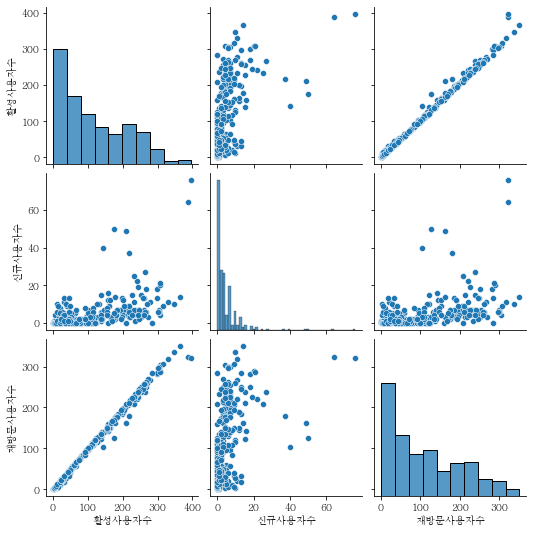

In [104]:
import seaborn
import matplotlib.pyplot as plt
seaborn.pairplot(df[["활성사용자수", "신규사용자수", "재방문사용자수"]])
plt.show()

## 히스토그램 분석
- 활성사용자수, 신규사용자수, 재방문사용자수의 상관관계를 분석하기 위하여 모든 변인간의 관계 그래프를 그려보았다.

### 알 수 있는 사실
- 활성 사용자수와 재방문사용자 수의 관계는 정비례한다.
- 그 외 나머지 변인들간의 관계는 보이지 않는다.

In [105]:
def list_to_datelist(data: list):
    return_data = []
    for i in  data:
        ch = "2021-" + i
        return_data.append(pd.to_datetime(ch))
    return return_data

event_date = ["2-18", "3-4", "3-13", "5-21", "5-23", "7-14", "7-29",
              "8-14", "9-3", "9-30", "10-13"]

event_date = list_to_datelist(event_date)
print(event_date)   # timestamp 형식으로 변환하여 row에 bool 형식으로 추가할 예정

[Timestamp('2021-02-18 00:00:00'), Timestamp('2021-03-04 00:00:00'), Timestamp('2021-03-13 00:00:00'), Timestamp('2021-05-21 00:00:00'), Timestamp('2021-05-23 00:00:00'), Timestamp('2021-07-14 00:00:00'), Timestamp('2021-07-29 00:00:00'), Timestamp('2021-08-14 00:00:00'), Timestamp('2021-09-03 00:00:00'), Timestamp('2021-09-30 00:00:00'), Timestamp('2021-10-13 00:00:00')]


In [106]:
df.loc[:, 'event_date'] = [0 for _ in range (297)]
for i in event_date:
    df.loc[df['date_id'] == i, 'event_date'] = 1
# 값 삽입
event_df = df.loc[df['event_date'] == 1]
event_df

,date_id,활성사용자수,활성사용자수(웰컴 및 Event 수신제외),신규사용자수,재방문사용자수,누적사용자수,event_date
46,2021-02-18,41,38,9,32,1395,1
60,2021-03-04,176,171,50,126,1535,1
69,2021-03-13,41,41,4,37,1672,1
137,2021-05-21,211,202,49,162,2219,1
139,2021-05-23,19,19,5,14,2237,1
190,2021-07-14,120,120,2,118,2400,1
205,2021-07-29,120,120,0,120,2412,1
220,2021-08-14,11,11,0,11,2424,1
239,2021-09-03,138,138,4,134,2459,1
266,2021-09-30,387,384,64,323,2585,1


In [107]:
before_marketing = []
after_marketing = []
for i in event_date:
    before_marketing.append(pd.date_range(i - pd.DateOffset(days=7), i - pd.DateOffset(days=1)))
    after_marketing.append(pd.date_range(i + pd.DateOffset(days=1), i + pd.DateOffset(days=7)))

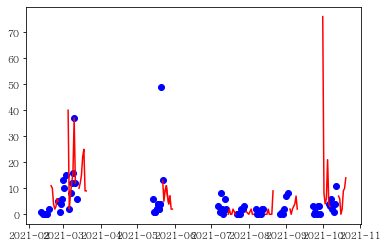

In [108]:
sum_of_before_marketing = []
sum_of_after_marketing = []

for i, j in zip(before_marketing, after_marketing):
    df2 = df[df['date_id'].isin(i)]
    df3 = df[df['date_id'].isin(j)]
    plt.scatter(df2['date_id'], df2['신규사용자수'], color="blue")
    plt.plot(df3['date_id'], df3['신규사용자수'], color="red")

## 결론

일부 데이터를 제외하고 대부분 붉은색 그래프가 푸른색 scatter 위에 웃도는것을 볼 수 있는데
특히 10월 데이터가 눈에 띄며, 해당 부분은 `학식` 블록에 `세미콘 식당`을 업데이트한 2차 대규모 패치 이후 임을 알 수 있다.

특히 이전까지 `세미콘식당`의 경우 자체 오픈채팅을 이용하여 식단을 공유하였으나, 산돌이에 합쳐짐으로 인해 해당 단톡 인원들이 추가된것으로 보인다.